In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Import excel file sheet by sheet

we have the following sheets  
* No degradation, No loading  
* No degradation, 50% load  
* No degradation, 75% load  
* No degradation, 100% load  
* No degradation, no load  
* Bearing degradation at 25% load  
* Bearing degradation at 50%  
* Bearing degradation at 75%  
* Bearing degradatio at 100%  
* Bearing degradation at no load 
* Gear mesh degradation @ no load  
* Gear mesh degradatn @ 25% load  
* Gear mesh degradatn at 50%  
* Gear mesh degradatn @ 75% load  
* Gear mesh degradatn @ 100% load  
* Degradatn with one element @50%  
* Degradatn with one element @25%  
* Air blower degradatn at no load  
* Air blower degradatn @25% load  
* Air blower degradatn @50%  
* Air blower degradatn @75% load  
* Air blower degradatn @100% load  
* Dryer online no degradtn & load  
* No degradation, No loading  

In [4]:
#Time (secs)
df = pd.read_excel('Machine_Data.xlsx', sheet_name='No degradation, No loading', index_col= 'Time (secs)')

In [6]:
df.head()

,Temp Started,Vibration Started,sound started
Time (secs),,,
1,40.50,-1.44,40
2,40.50,1.24,39
3,40.75,-1.83,41
4,40.50,-0.79,40
5,40.50,-1.90,47


In [7]:
df.tail()

,Temp Started,Vibration Started,sound started
Time (secs),,,
3860,42.5,1.28,35
3861,42.5,1.28,35
3862,42.5,1.28,35
3863,42.5,1.28,35
3864,42.5,1.28,35


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3864 entries, 1 to 3864
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp Started       3864 non-null   float64
 1   Vibration Started  3864 non-null   float64
 2   sound started      3864 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 120.8 KB


In [10]:
# How many rows per day? we know its every secs
len(df)

3864

In [11]:
# let's train on 1 hr(60*60) dataset and test on the rest
test_ind = len(df) - 3600 #60*60 = 1hr
test_ind

264

In [12]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [13]:
train.head()

,Temp Started,Vibration Started,sound started
Time (secs),,,
1,40.50,-1.44,40
2,40.50,1.24,39
3,40.75,-1.83,41
4,40.50,-0.79,40
5,40.50,-1.90,47


In [14]:
test.head()

,Temp Started,Vibration Started,sound started
Time (secs),,,
3601,41.50,-1.05,39
3602,42.25,0.16,34
3603,41.25,0.10,37
3604,42.00,-1.23,40
3605,41.25,2.72,36


In [20]:
#!pip install --upgrade pip
#!pip install scikit-learn
#!pip install tensorflow

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(train)

MinMaxScaler()

In [24]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
# define generator
length = 120 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [28]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 41,903
Trainable params: 41,903
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [31]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


C:\Users\hp\AppData\Local\Temp\ipykernel_16972\687208369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,


3480/3480 [==============================] - 194s 55ms/step - loss: 0.0301 - val_loss: 0.0260
Epoch 2/10
3480/3480 [==============================] - 178s 51ms/step - loss: 0.0201 - val_loss: 0.0149
Epoch 3/10
3480/3480 [==============================] - 179s 51ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 4/10
3480/3480 [==============================] - 181s 52ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 5/10
3480/3480 [==============================] - 190s 55ms/step - loss: 0.0054 - val_loss: 0.0066
Epoch 6/10
3480/3480 [==============================] - 177s 51ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 7/10
3480/3480 [==============================] - 176s 50ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 8/10
3480/3480 [==============================] - 175s 50ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 9/10
3480/3480 [==============================] - 178s 51ms/step - loss: 0.0034 - val_loss: 0.0045


In [32]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot: >

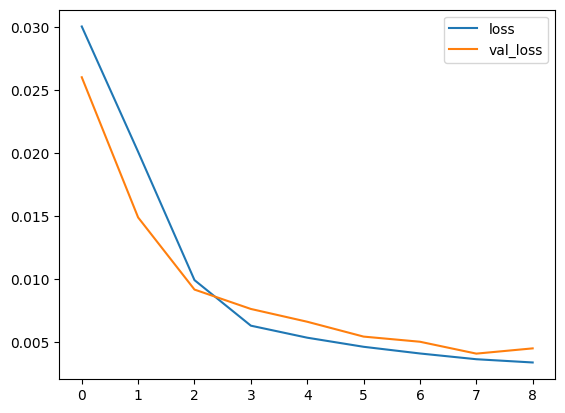

In [33]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [34]:
#!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [35]:
first_eval_batch = scaled_train[-length:]

In [36]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [37]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 616ms/step


array([[0.55085367, 0.27932948, 0.5852326 ]], dtype=float32)

In [38]:
scaled_test[0]

array([0.55555556, 0.29026846, 0.6       ])

In [39]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 54ms/step


In [40]:
test_predictions

[array([0.55085367, 0.27932948, 0.5852326 ], dtype=float32),
 array([0.9180924 , 0.50399745, 0.34553444], dtype=float32),
 array([0.45272917, 0.4739337 , 0.4983851 ], dtype=float32),
 array([0.79614395, 0.2524704 , 0.6529255 ], dtype=float32),
 array([0.44216508, 0.944415  , 0.44663754], dtype=float32),
 array([0.7786999 , 0.8290517 , 0.43407655], dtype=float32),
 array([0.76101345, 0.20971891, 0.59485626], dtype=float32),
 array([0.72058976, 0.46453238, 0.64114   ], dtype=float32),
 array([0.97741354, 0.9908026 , 0.86833286], dtype=float32),
 array([0.76593226, 0.3928836 , 0.7013967 ], dtype=float32),
 array([0.87150687, 0.3348568 , 0.48408964], dtype=float32),
 array([0.8831374 , 0.22389609, 0.5479074 ], dtype=float32),
 array([0.8215048 , 0.8416725 , 0.54706776], dtype=float32),
 array([0.84846365, 0.6071811 , 0.4592714 ], dtype=float32),
 array([0.67172027, 0.75668687, 0.5473414 ], dtype=float32),
 array([0.5821174 , 0.56370926, 0.5430583 ], dtype=float32),
 array([0.5145575 , 0.24

In [41]:
scaled_test

array([[0.55555556, 0.29026846, 0.6       ],
       [0.88888889, 0.49328859, 0.35      ],
       [0.44444444, 0.48322148, 0.5       ],
       [0.77777778, 0.26006711, 0.65      ],
       [0.44444444, 0.92281879, 0.45      ],
       [0.77777778, 0.82550336, 0.45      ],
       [0.77777778, 0.21812081, 0.6       ],
       [0.77777778, 0.45805369, 0.65      ],
       [1.        , 1.        , 0.85      ],
       [0.77777778, 0.40100671, 0.7       ],
       [0.88888889, 0.3204698 , 0.5       ],
       [0.88888889, 0.20302013, 0.55      ],
       [0.88888889, 0.74161074, 0.55      ],
       [0.88888889, 0.55872483, 0.5       ],
       [0.77777778, 0.75167785, 0.55      ],
       [0.66666667, 0.59060403, 0.55      ],
       [0.55555556, 0.31543624, 0.55      ],
       [0.66666667, 0.42114094, 0.55      ],
       [0.66666667, 0.71308725, 0.65      ],
       [0.77777778, 0.32550336, 0.55      ],
       [0.66666667, 0.79865772, 0.7       ],
       [0.88888889, 0.19127517, 0.55      ],
       [1.

In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [43]:
true_predictions

array([[ 4.14894208e+01, -1.11519631e+00,  3.87046523e+01],
       [ 4.23157080e+01,  2.23824773e-01,  3.39106889e+01],
       [ 4.12686406e+01,  4.46448326e-02,  3.69677020e+01],
       [ 4.20413239e+01, -1.27527639e+00,  4.00585098e+01],
       [ 4.12448714e+01,  2.84871324e+00,  3.59327508e+01],
       [ 4.20020747e+01,  2.16114797e+00,  3.56815310e+01],
       [ 4.19622803e+01, -1.53007528e+00,  3.88971252e+01],
       [ 4.18713270e+01, -1.13870430e-02,  3.98227997e+01],
       [ 4.24491805e+01,  3.12518341e+00,  4.43666573e+01],
       [ 4.19733476e+01, -4.38413751e-01,  4.10279341e+01],
       [ 4.22108905e+01, -7.84253423e-01,  3.66817929e+01],
       [ 4.22370592e+01, -1.44557933e+00,  3.79581482e+01],
       [ 4.20983857e+01,  2.23636798e+00,  3.79413552e+01],
       [ 4.21590432e+01,  8.38799191e-01,  3.61854280e+01],
       [ 4.17613706e+01,  1.72985372e+00,  3.79468281e+01],
       [ 4.15597641e+01,  5.79707184e-01,  3.78611655e+01],
       [ 4.14077543e+01, -1.30110252e+00

In [44]:
test.head()

,Temp Started,Vibration Started,sound started
Time (secs),,,
3601,41.50,-1.05,39
3602,42.25,0.16,34
3603,41.25,0.10,37
3604,42.00,-1.23,40
3605,41.25,2.72,36


In [45]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [48]:
true_predictions.head()

,Temp Started,Vibration Started,sound started
0,41.489421,-1.115196,38.704652
1,42.315708,0.223825,33.910689
2,41.268641,0.044645,36.967702
3,42.041324,-1.275276,40.058510
4,41.244871,2.848713,35.932751


In [49]:
test.tail()

,Temp Started,Vibration Started,sound started
Time (secs),,,
3860,42.5,1.28,35
3861,42.5,1.28,35
3862,42.5,1.28,35
3863,42.5,1.28,35
3864,42.5,1.28,35


In [50]:
true_predictions.tail()

,Temp Started,Vibration Started,sound started
259,41.944827,0.202936,37.563819
260,41.935828,0.100936,37.924702
261,41.948112,0.133861,38.177487
262,41.973498,0.187964,38.297270
263,42.001359,0.182844,38.283158
